There is yet another approach to clustering, which doesn't require assumptions of spherical hyperspheres like $k$-means does, or partition into a hierarchical set of clusters with a manual cutoff. DBSCAN (density based spatial clustering of applications with noise) is a density based clustering approach that assigns cluster labels based on dense regions of points, where density is defined as the number of points within an $\varepsilon$ ball of a coordinate.

DBSCAN labels points into 3 categories:

1) Core point: Requires at least a certain number of specified neighboring points to fall within an $\varepsilon$ ball of the point. The minimum number of points (MinPts) to be classified as a core point is a parameter.
2) Border point: Fewer than MinPts neighbors within an $\varepsilon$ ball, but has a core point as such a neighbor.
3) Noise point: Not a core or border point.

The DBSCAN algortihm is as follows:
1) Assign point labels.
2) Each core point or connected group of core points (core points that less than $\varepsilon$ away from each other) is labeled a cluster.
3) Assign all border points to their corresponding core points.

Advantages:
- No assumptions of cluster shapes.
- Can ignore noise - doesn't have to classify them all.

Disadvantages:
- Like most other clustering techniques that rely on a Euclidean distance metric, the curse of dimensionality.
- 2 hyperparameters, $\varepsilon$ and MinPts to optimize.
- Hyperparameter optimization can be problematic if the density of points has a high variance over the dataset.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

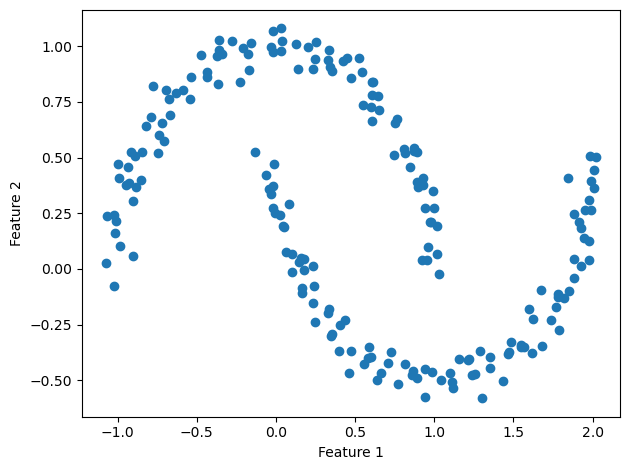

In [3]:
# Let's create a dataset that is non-spherically separated:

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200,
noise=0.05, 
random_state=0)

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

c:\Users\sadit\miniconda3\envs\dataexercises\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


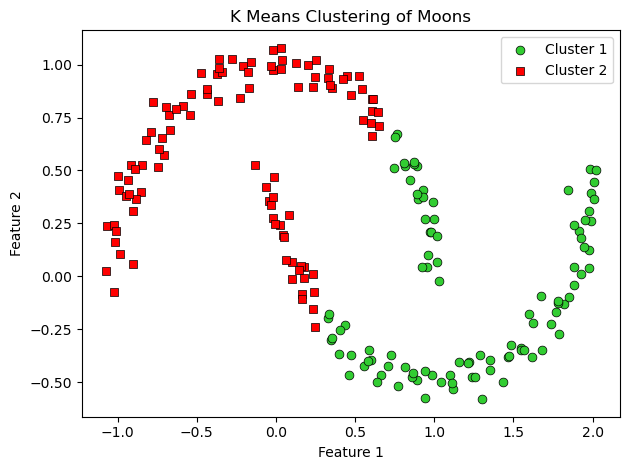

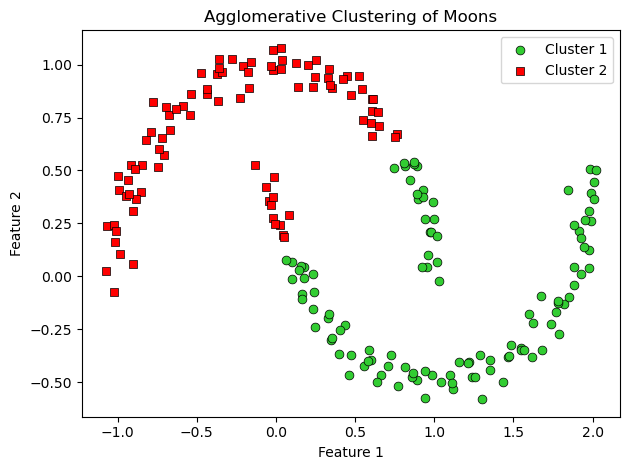

In [9]:
# Let's check out how K Means and agglomerative hierarchical clustering work on this:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

km = KMeans(n_clusters=2,
            init='k-means++', # default is 'k-means++'
            n_init=10, # reinitialize 10 times
            max_iter=300, # 300 iterations per initialization at most
            tol=1e-4, # stop before max_iter if the clusters do not change by more than 1e-4
            random_state=42)

ac = AgglomerativeClustering(n_clusters=2,
metric='euclidean',
linkage='complete')

y_km = km.fit_predict(X)
y_ac = ac.fit_predict(X)

sns.scatterplot(x=X[y_km == 0, 0], y=X[y_km == 0, 1], c='limegreen', edgecolor='black', marker='o', s=40, label='Cluster 1')
sns.scatterplot(x=X[y_km == 1, 0], y=X[y_km == 1, 1], c='red', edgecolor='black', marker='s', s=40, label='Cluster 2')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc='best')
plt.title("K Means Clustering of Moons")
plt.tight_layout()
plt.show()


sns.scatterplot(x=X[y_ac == 0, 0], y=X[y_ac == 0, 1], c='limegreen', edgecolor='black', marker='o', s=40, label='Cluster 1')
sns.scatterplot(x=X[y_ac == 1, 0], y=X[y_ac == 1, 1], c='red', edgecolor='black', marker='s', s=40, label='Cluster 2')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc='best')
plt.title("Agglomerative Clustering of Moons")
plt.tight_layout()
plt.show()

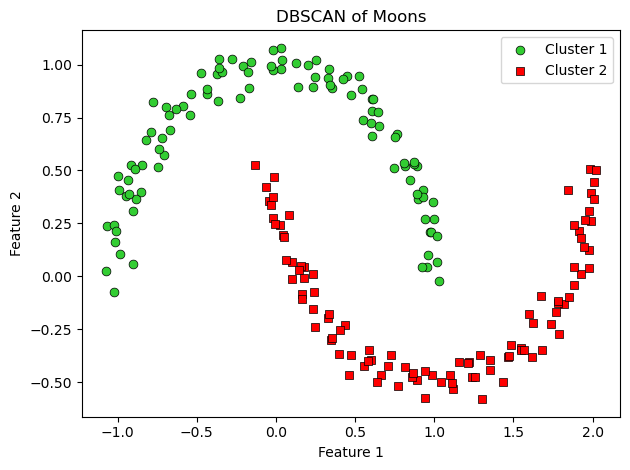

In [10]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2,
min_samples=5,
metric='euclidean')

y_db = db.fit_predict(X)

sns.scatterplot(x=X[y_db == 0, 0], y=X[y_db == 0, 1], c='limegreen', edgecolor='black', marker='o', s=40, label='Cluster 1')
sns.scatterplot(x=X[y_db == 1, 0], y=X[y_db == 1, 1], c='red', edgecolor='black', marker='s', s=40, label='Cluster 2')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc='best')
plt.title("DBSCAN of Moons")
plt.tight_layout()
plt.show()

Clearly, DBSCAN can be a significant improvement over other spherical clustering mechanisms when the shape becomes slightly more arbitrary.